# Region Perturbation

Demo of Region Perturbation algorithm with inpainting and random perturbation modes.

In [1]:
%load_ext autoreload
%autoreload 2

## LRP

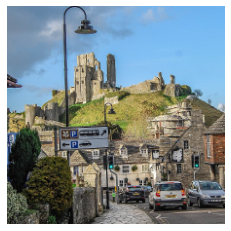

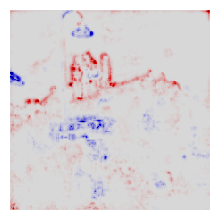

In [2]:
from typing import Callable, Dict, List, Tuple, Union

import numpy
import torch
import torchvision
from matplotlib import pyplot as plt

import lrp.plot
from lrp import image, rules
from lrp.core import LRP
from lrp.filter import LayerFilter
from lrp.rules import LrpEpsilonRule, LrpGammaRule, LrpZBoxRule, LrpZeroRule
from lrp.zennit.types import AvgPool, Linear

# Input data
# Image is in RGB mode with range [0,1]
img_bgr_hwc_float_0_1: numpy.array = image.load_img_norm_zero_one(
    '../../../data/castle.jpg')
X = lrp.norm.ImageNetNorm.transform(img_bgr_hwc_float_0_1)
# Simulate batch by adding a new dimension
X = torch.unsqueeze(X, 0)

plt.axis('off')
lrp.plot.plot_imagenet(X)

# Model
model = torchvision.models.vgg16(pretrained=True)
model.eval()

# Low and high parameters for zB-rule
batch_size: int = 1
shape: Tuple[int] = (batch_size, 3, 224, 224)

low: torch.Tensor = lrp.norm.ImageNetNorm.normalize(torch.zeros(*shape))
high: torch.Tensor = lrp.norm.ImageNetNorm.normalize(torch.ones(*shape))

# Init layer filter
vgg16_target_types: Tuple[type] = (Linear, AvgPool)
filter_by_layer_index_type: LayerFilter = LayerFilter(model)
filter_by_layer_index_type.set_target_types(vgg16_target_types)

name_map: List[Tuple[List[str], rules.LrpRule,
                     Dict[str, Union[torch.Tensor, float]]]]
name_map = [
    (filter_by_layer_index_type(lambda n: n == 0), LrpZBoxRule, {'low': low, 'high': high}),
    (filter_by_layer_index_type(lambda n: 1 <= n <= 16), LrpGammaRule, {'gamma': 0.25}),
    (filter_by_layer_index_type(lambda n: 17 <= n <= 30), LrpEpsilonRule, {'epsilon': 0.25}),
    (filter_by_layer_index_type(lambda n: 31 <= n), LrpZeroRule, {}),
]

lrp_instance: LRP = LRP(model)
lrp_instance.convert_layers(name_map)
R: torch.Tensor = lrp_instance.relevance(X)
lrp_instance.heatmap(R, width=2, height=2)

## Region Perturbation

Try Region Perturbation with inpainting enabled.

Finished '_flip' in 0.1637 secs
Finished '_flip' in 0.1379 secs
Finished '_flip' in 0.1395 secs
Finished '_flip' in 0.1413 secs
Finished '_flip' in 0.1525 secs
Finished '_flip' in 0.1620 secs
Finished '_flip' in 0.1548 secs
Finished '_flip' in 0.1497 secs
Finished '_flip' in 0.1471 secs
Finished '_flip' in 0.1444 secs
Finished '_flip' in 0.1479 secs
Finished '_flip' in 0.1523 secs
Finished '_flip' in 0.1514 secs
Finished '_flip' in 0.1668 secs
Finished '_flip' in 0.1568 secs
Finished '_flip' in 0.1534 secs
Finished '_flip' in 0.1570 secs
Finished '_flip' in 0.1581 secs
Finished '_flip' in 0.1627 secs
Finished '_flip' in 0.1580 secs
Finished '_flip' in 0.1627 secs
Finished '_flip' in 0.1613 secs
Finished '_flip' in 0.1612 secs
Finished '_flip' in 0.1646 secs
Finished '_flip' in 0.1743 secs
Finished '_flip' in 0.1707 secs
Finished '_flip' in 0.1803 secs
Finished '_flip' in 0.1509 secs
Finished '_flip' in 0.1407 secs
Finished '__call__' in 4.7130 secs


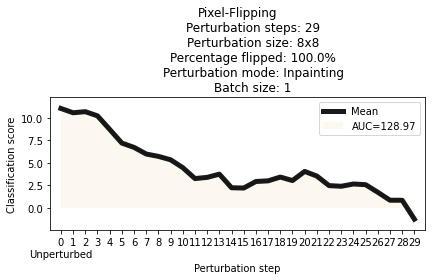

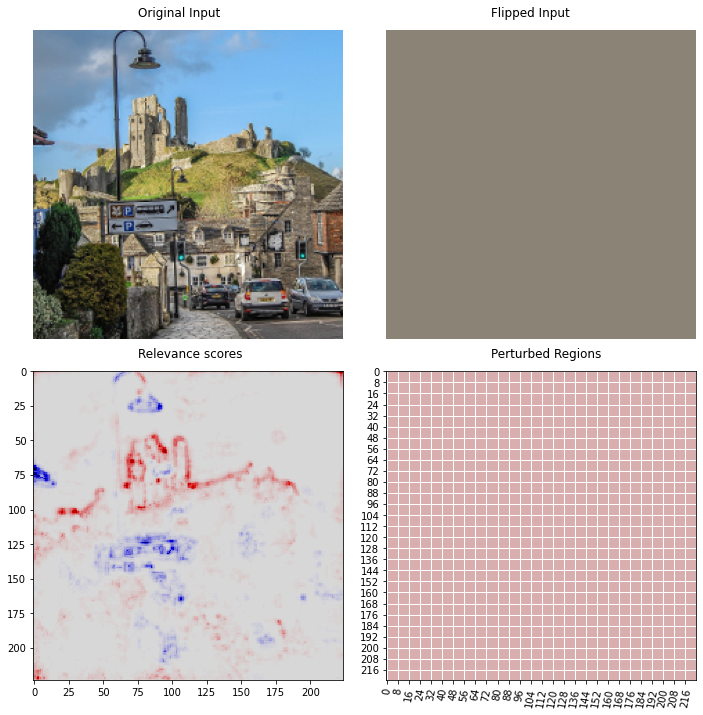

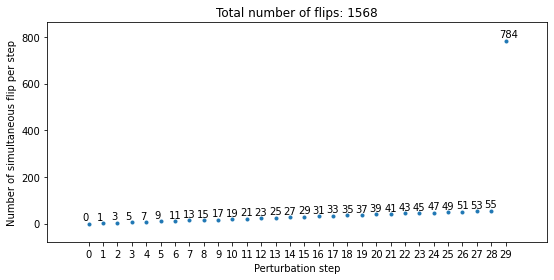

In [3]:
# %%script false --no-raise-error

from pf.core import PixelFlipping
# Parameters for cell: input_nchw, relevance_scores_nchw, lrp_instance
from pf.perturbation_modes.constants import PerturbModes

perturbation_steps: int = 29
perturbation_size: int = 8

pixel_flipping_instance: PixelFlipping = PixelFlipping(perturbation_steps=perturbation_steps,
                                                       perturbation_size=perturbation_size,
                                                       perturb_mode=PerturbModes.INPAINTING)
input_nchw: torch.Tensor = X.clone().detach()

# Enable reproducibility
torch.manual_seed(42)

relevance_scores_nchw: torch.Tensor = R.clone().detach()

# Function should return the (single-class) classification score for
# the given input to measure the difference between flips.
forward_pass: Callable[[torch.Tensor], float]
def forward_pass(input_nchw): return lrp_instance.model(input_nchw)[:, 483]


# Run Pixel-Flipping algorithm
pixel_flipping_instance(input_nchw, relevance_scores_nchw, forward_pass)
pixel_flipping_instance.plot_class_prediction_scores()
pixel_flipping_instance.plot_image_comparison()
pixel_flipping_instance.plot_number_of_flips_per_step()

Finished '_flip' in 0.1477 secs
Finished '_flip' in 0.1480 secs
Finished '_flip' in 0.1435 secs
Finished '_flip' in 0.1388 secs
Finished '_flip' in 0.1419 secs
Finished '_flip' in 0.1420 secs
Finished '_flip' in 0.1413 secs
Finished '_flip' in 0.1401 secs
Finished '_flip' in 0.1427 secs
Finished '_flip' in 0.1476 secs
Finished '_flip' in 0.1430 secs
Finished '_flip' in 0.1414 secs
Finished '_flip' in 0.1394 secs
Finished '_flip' in 0.1411 secs
Finished '_flip' in 0.1518 secs
Finished '_flip' in 0.1502 secs
Finished '_flip' in 0.1421 secs
Finished '_flip' in 0.1384 secs
Finished '_flip' in 0.1437 secs
Finished '_flip' in 0.1428 secs
Finished '_flip' in 0.1422 secs
Finished '_flip' in 0.1433 secs
Finished '_flip' in 0.1486 secs
Finished '_flip' in 0.1463 secs
Finished '_flip' in 0.1446 secs
Finished '_flip' in 0.1497 secs
Finished '_flip' in 0.1542 secs
Finished '_flip' in 0.1487 secs
Finished '_flip' in 0.1495 secs
Finished '__call__' in 4.3473 secs


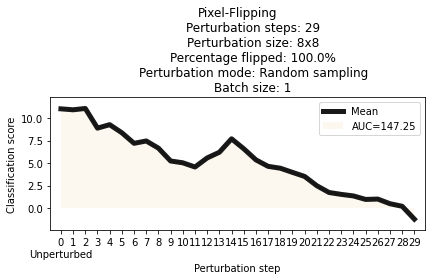

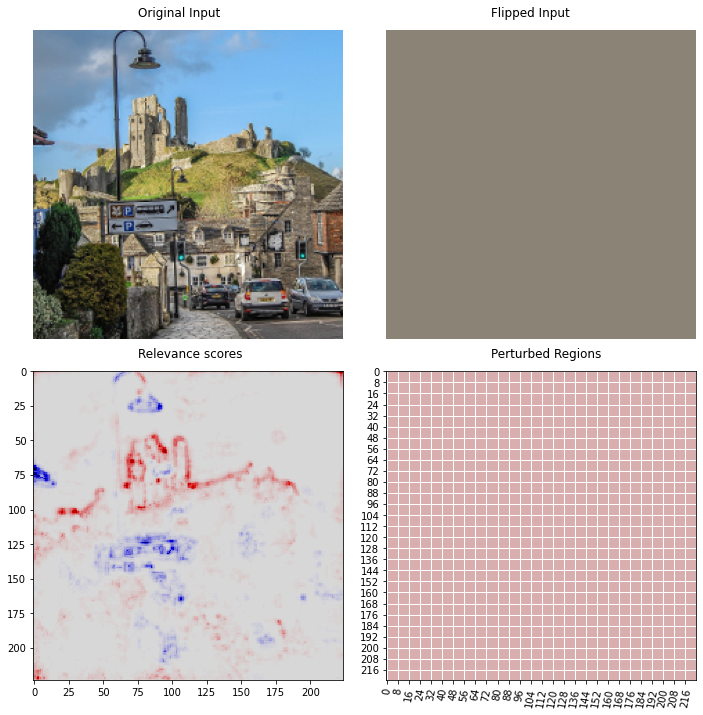

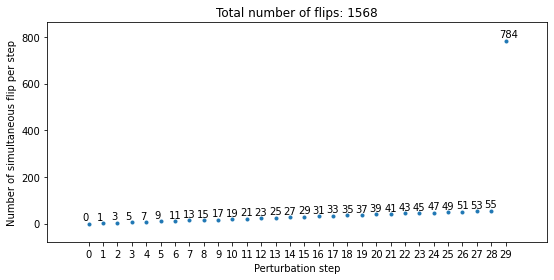

In [4]:
# %%script false --no-raise-error

from pf.core import PixelFlipping
# Parameters for cell: input_nchw, relevance_scores_nchw, lrp_instance
from pf.perturbation_modes.constants import PerturbModes

perturbation_steps: int = 29
perturbation_size: int = 8

pixel_flipping_instance: PixelFlipping = PixelFlipping(perturbation_steps=perturbation_steps,
                                                       perturbation_size=perturbation_size,
                                                       perturb_mode=PerturbModes.RANDOM)
input_nchw: torch.Tensor = X.clone().detach()

# Enable reproducibility
torch.manual_seed(42)

relevance_scores_nchw: torch.Tensor = R.clone().detach()

# Function should return the (single-class) classification score for
# the given input to measure the difference between flips.
forward_pass: Callable[[torch.Tensor], float]
def forward_pass(input_nchw): return lrp_instance.model(input_nchw)[:, 483]


# Run Pixel-Flipping algorithm
pixel_flipping_instance(input_nchw, relevance_scores_nchw, forward_pass)
pixel_flipping_instance.plot_class_prediction_scores()
pixel_flipping_instance.plot_image_comparison()
pixel_flipping_instance.plot_number_of_flips_per_step()